# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


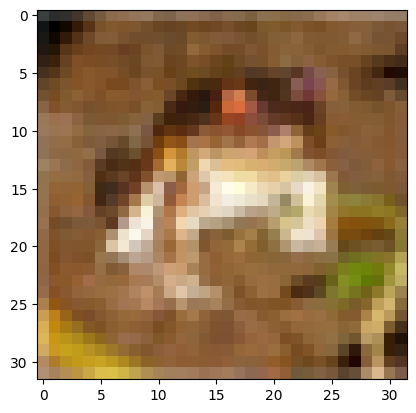

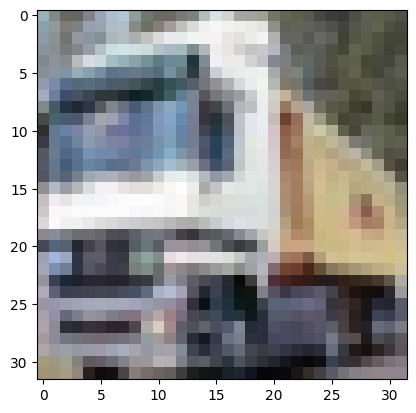

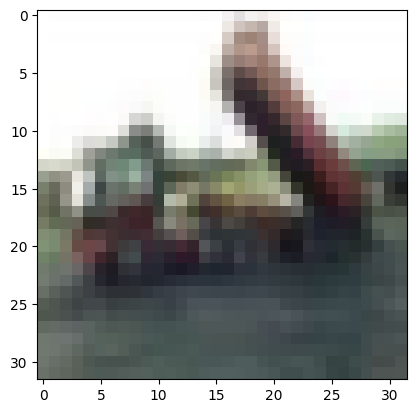

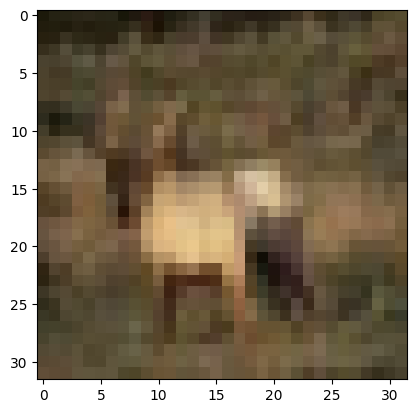

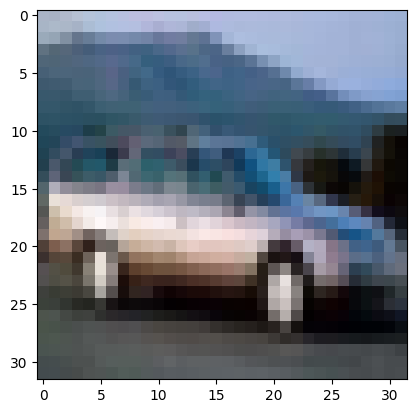

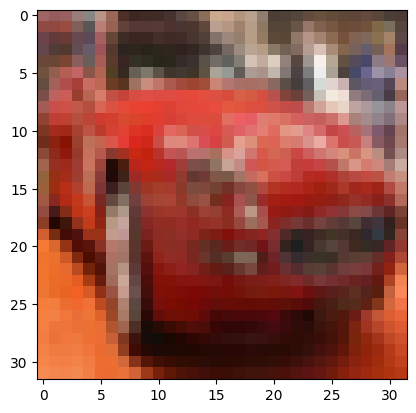

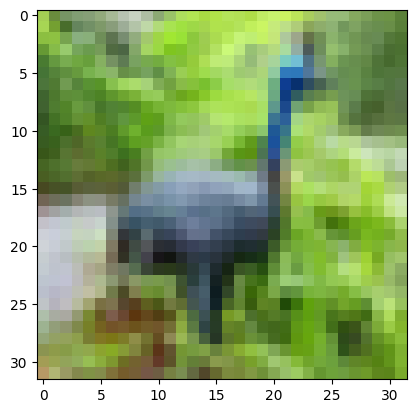

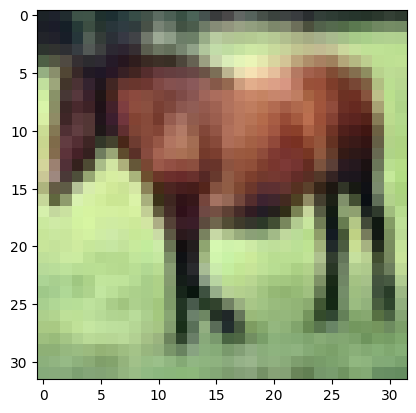

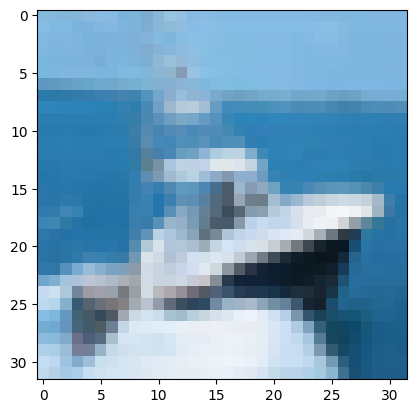

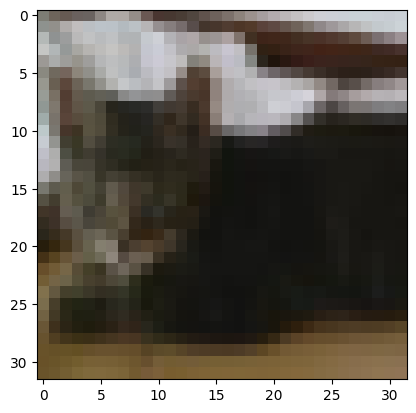

In [2]:
# Your code here :
for i in range(10):
    plt.imshow(x_train[i])
    plt.show()

In [3]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test,10)

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [19]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout

model = Sequential([
        # طبقة تلافيفية واحدة مع 32 مرشحًا بحجم (3,3)
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D(pool_size=(2,2)),

        # تحويل المخرجات إلى متجه للتصنيف
        layers.Flatten(),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 تصنيفات
    ])


model.summary()
model.compile(optimizer='adam' , loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [20]:
# Your code here :
model.compile(optimizer="SGD", loss='categorical_crossentropy', metrics=['accuracy'])

# تدريب النموذج
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.1420 - loss: 2.2855 - val_accuracy: 0.2273 - val_loss: 2.2220
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2377 - loss: 2.1987 - val_accuracy: 0.2777 - val_loss: 2.1205
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2789 - loss: 2.0928 - val_accuracy: 0.2991 - val_loss: 2.0190
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3052 - loss: 1.9963 - val_accuracy: 0.3201 - val_loss: 1.9456
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3285 - loss: 1.9292 - val_accuracy: 0.3327 - val_loss: 1.9071
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3442 - loss: 1.8817 - val_accuracy: 0.3534 - val_loss: 1.8594
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3589 - loss: 1.8512 - val_accuracy: 0.3308 - val_loss: 1.8651
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3622 - loss: 1.8321 - val_accuracy: 0.3706 - v

*   Plot the cross entropy loss curve and the accuracy curve

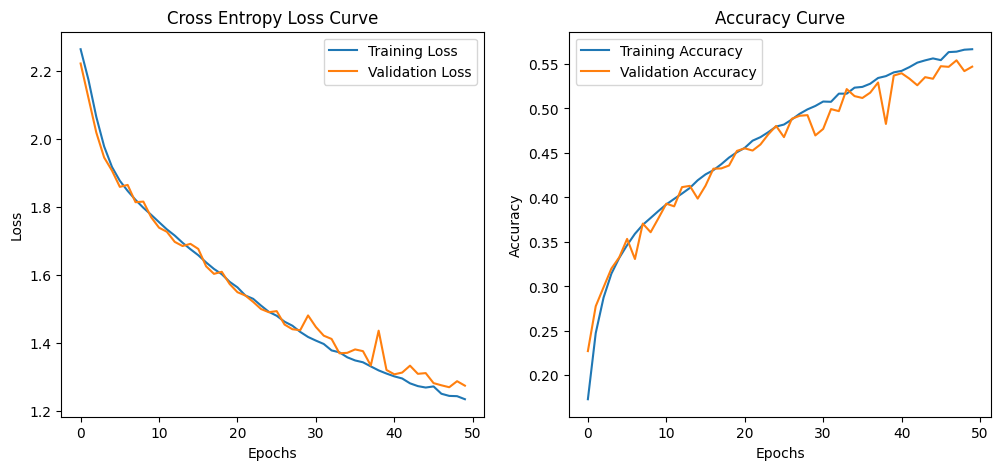

In [21]:
import matplotlib.pyplot as plt

# رسم منحنى الخسارة والدقة
plt.figure(figsize=(12,5))

# رسم منحنى الخسارة
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# رسم منحنى الدقة
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [35]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy:.2f}% \nloss: {loss:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5495 - loss: 1.2733
Accuracy: 0.55% 
loss: 1.27


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
from keras.backend import clear_session
clear_session()

In [22]:
# Your code here :

model_2 =Sequential([
        # الطبقة الأولى: طبقتان تلافيفيتان مع 32 مرشحًا كل منهما بحجم (3,3)
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        # تحويل المخرجات إلى متجه للتصنيف
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 تصنيفات
    ])


model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [23]:
# Your code here :
model_2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.1726 - loss: 2.2676 - val_accuracy: 0.2514 - val_loss: 2.1430
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.2626 - loss: 2.0983 - val_accuracy: 0.3132 - val_loss: 1.9815
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3031 - loss: 1.9701 - val_accuracy: 0.3378 - val_loss: 1.9063
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3252 - loss: 1.9104 - val_accuracy: 0.3534 - val_loss: 1.8471
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3556 - loss: 1.8472 - val_accuracy: 0.3606 - val_loss: 1.8475
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3721 - loss: 1.8004 - val_accuracy: 0.3722 - val_loss: 1.7768
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3881 - loss: 1.7585 - val_accuracy: 0.3624 - val_loss: 1.7906
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3902 - loss: 1.7484 - val_accuracy: 0.4006 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


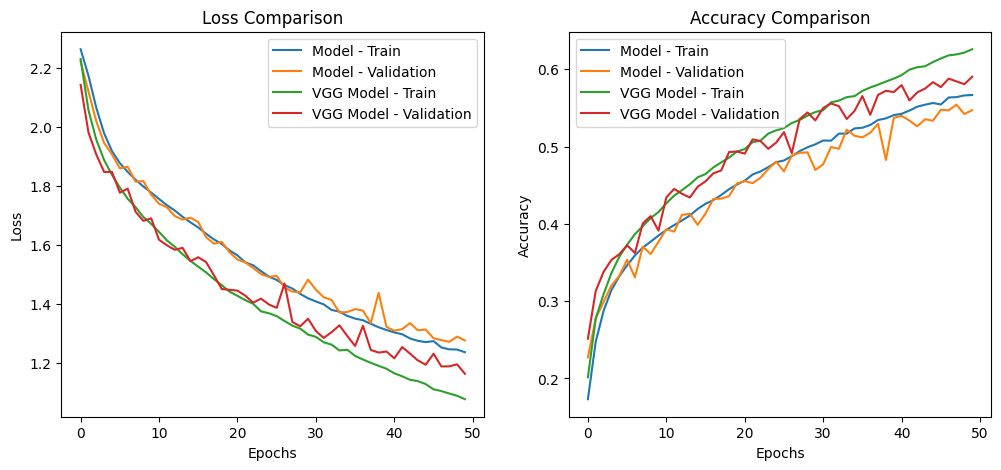

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Plot Loss Curves
axes[0].plot(history.history['loss'], label='Model - Train')
axes[0].plot(history.history['val_loss'], label='Model - Validation')
axes[0].plot(history_2.history['loss'], label='VGG Model - Train')
axes[0].plot(history_2.history['val_loss'], label='VGG Model - Validation')
axes[0].set_title('Loss Comparison')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot Accuracy Curves
axes[1].plot(history.history['accuracy'], label='Model - Train')
axes[1].plot(history.history['val_accuracy'], label='Model - Validation')
axes[1].plot(history_2.history['accuracy'], label='VGG Model - Train')
axes[1].plot(history_2.history['val_accuracy'], label='VGG Model - Validation')
axes[1].set_title('Accuracy Comparison')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


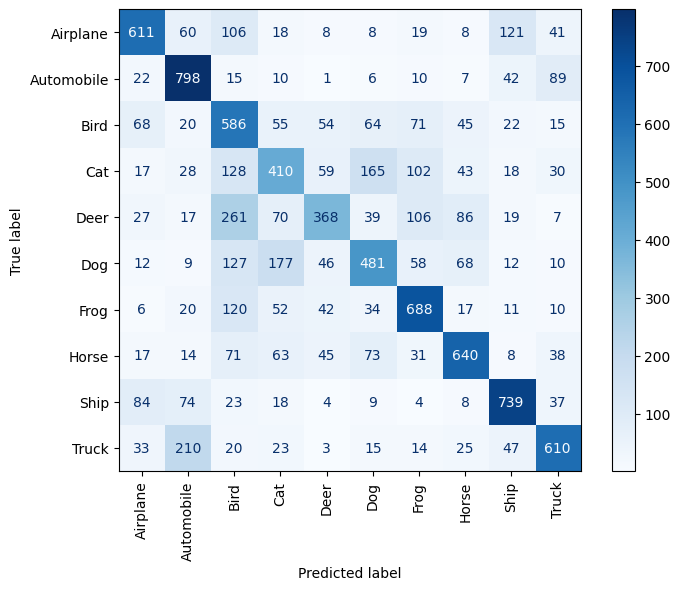

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
pred = model_2.predict(x_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

matrix = confusion_matrix(y_true, y_pred)
# Plot confusion matrix
Display = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=[
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
])
fig, ax = plt.subplots(figsize=(8, 6))
Display = Display.plot(xticks_rotation='vertical', ax=ax,cmap="Blues")

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [34]:
loss, accuracy = model_2.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy:.2f}% \nloss: {loss:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5912 - loss: 1.1526
Accuracy: 0.59% 
loss: 1.15


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [36]:
import tensorflow as tf

x_train_resized = tf.image.resize(x_train, (64, 64))
x_test_resized = tf.image.resize(x_test, (64, 64))

In [39]:
model_3 = Sequential([
        # الطبقة الأولى: طبقتان تلافيفيتان مع 64 مرشحًا كل منهما بحجم (3,3)
        layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        # الطبقة الثانية: طبقتان تلافيفيتان مع 128 مرشحًا
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        # الطبقة الثالثة: طبقتان تلافيفيتان مع 256 مرشحًا
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        # تحويل المخرجات إلى متجه للتصنيف
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 تصنيفات
    ])
model_3.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [40]:
batch_size = 512
epochs = 10
model_3.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history_3 = model_3.fit(x_train_resized, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test_resized, y_test), verbose=1)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 109s 794ms/step - accuracy: 0.1035 - loss: 2.3004 - val_accuracy: 0.1257 - val_loss: 2.2935
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 370ms/step - accuracy: 0.1190 - loss: 2.2898 - val_accuracy: 0.1619 - val_loss: 2.2699
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 369ms/step - accuracy: 0.1783 - loss: 2.2517 - val_accuracy: 0.1994 - val_loss: 2.1679
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 366ms/step - accuracy: 0.2164 - loss: 2.1524 - val_accuracy: 0.2104 - val_loss: 2.1257
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 366ms/step - accuracy: 0.2513 - loss: 2.0977 - val_accuracy: 0.2749 - val_loss: 2.0200
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 366ms/step - accuracy: 0.2899 - loss: 2.0249 - val_accuracy: 0.3349 - val_loss: 1.9147
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 367ms/step - accuracy: 0.3173 - loss: 1.9595 - val_accuracy: 0.3457 - val_loss: 1.8490
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 366ms/step - accuracy: 0.3391 - loss: 1.8839 - val_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


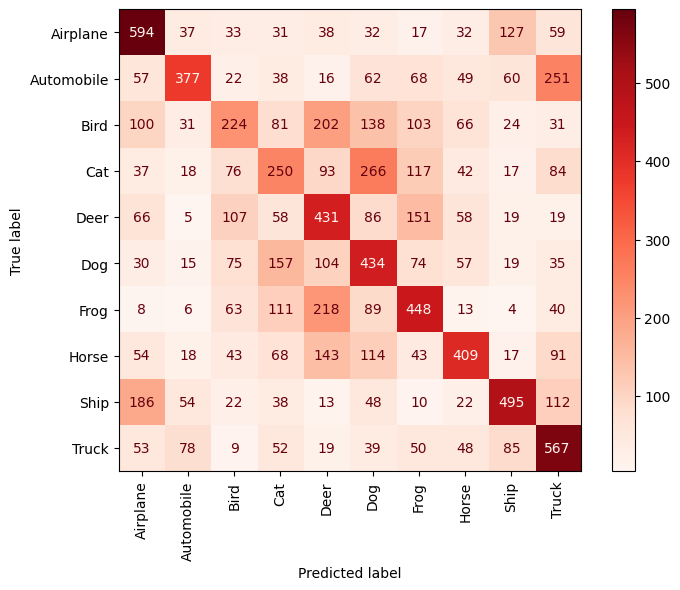

In [43]:

pred_comp = model_3.predict(x_test_resized)
y_pred_comp = np.argmax(pred_comp, axis=1)
y_true_comp = np.argmax(y_test, axis=1)
# Compute confusion matrix
matrix = confusion_matrix(y_true_comp, y_pred_comp)
# Plot confusion matrix
Display = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=[
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
])
fig, ax = plt.subplots(figsize=(8, 6))
Display = Display.plot(xticks_rotation='vertical', ax=ax,cmap="Reds")

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
